In [15]:
function distance(x,y)
    return sqrt(sum((x-y).^2))
end

distance (generic function with 1 method)

In [17]:
using DelimitedFiles;
data = readdlm("./magic04.csv",',',skipstart=1)

19020×11 Array{Any,2}:
  28.7967   16.0021  2.6449  0.3918  …   -8.2027  40.092    81.8828  "g"
  31.6036   11.7235  2.5185  0.5303      -9.9574   6.3609  205.261   "g"
 162.052   136.031   4.0612  0.0374     -45.216   76.96    256.788   "g"
  23.8172    9.5728  2.3385  0.6147      -7.1513  10.449   116.737   "g"
  75.1362   30.9205  3.1611  0.3168      21.8393   4.648   356.462   "g"
  51.624    21.1502  2.9085  0.242   …    9.8145   3.613   238.098   "g"
  48.2468   17.3565  3.0332  0.2529      10.5868   4.792   219.087   "g"
  26.7897   13.7595  2.5521  0.4236      -2.9292   0.812   237.134   "g"
  96.2327   46.5165  4.154   0.0779      43.1844   4.854   248.226   "g"
  46.7619   15.1993  2.5786  0.3377      -6.6812   7.875   102.251   "g"
  62.7766   29.9104  3.3331  0.2475  …   23.771    9.9144  323.094   "g"
  18.8562   16.46    2.4385  0.5282     -16.9327  11.461   162.848   "g"
  45.6321   22.71    3.0441  0.2213     -14.3164   0.3822  178.255   "g"
   ⋮                        

### Data manipulation

So, defining:

datarows - total number of rows in the dataset
trainrows - number of rows in the training set (80% of the datarows)
permindex - random permutation of length datarows, used to randomly select training and test/val subsets 

In [21]:
datarows = length(data[:,1])

19020

In [22]:
datacolumns = length(data[1,:]) - 1

10

In [23]:
trainrows = div(datarows,5) * 4

15216

In [70]:
using Random; # https://docs.julialang.org/en/v1/stdlib/Random/index.html
permindex = randperm(datarows)

19020-element Array{Int64,1}:
  6323
  3024
 14092
  2232
 15894
  1231
 18055
  1787
 12259
 17744
  8502
 17813
 11831
     ⋮
  5865
  7079
 18411
 16389
  2709
 17964
 10665
  9299
 16744
  2098
  1796
 18481

In [25]:
trainset = data[permindex[1:trainrows],:]

15216×11 Array{Any,2}:
  13.0752  10.4034  2.1319  0.7823  …   -9.5705  56.4494  166.803   "g"
  36.1741  17.6865  2.946   0.2865      11.3256   0.254   191.455   "g"
  35.5217  16.5461  2.6613  0.3664       7.5723  11.586   213.452   "g"
 103.407   64.4265  4.1762  0.0668      49.2008  74.192   159.135   "h"
  23.1655  20.9149  2.659   0.4079      14.8946  24.7031  156.686   "g"
  27.5203  11.1225  2.3598  0.4629  …   10.0941  57.6127  151.036   "g"
 100.607   27.9874  3.3503  0.1567     -12.9894   1.2458  312.22    "g"
  86.4233  23.8555  3.3173  0.2986      -9.5435   5.462   321.665   "g"
  96.7683  38.3376  4.0542  0.1104      25.042    0.823   274.291   "g"
  12.6721  11.7224  2.081   0.7054      -8.9896  74.518   151.218   "g"
  85.8378  49.6255  3.7247  0.1331  …  -37.324   58.0625  242.923   "h"
  21.295   16.3565  2.6015  0.433      -11.6914  12.4043   80.0502  "g"
  84.1395  62.2117  3.5393  0.1137     -36.8499  21.5273  121.422   "h"
   ⋮                                ⋱    

In [26]:
testset = data[permindex[trainrows+1:end],:]

3804×11 Array{Any,2}:
  69.6783  12.7037  2.6675  0.3183  …    8.6389   9.78    205.687   "g"
  82.7708  25.18    3.2694  0.2189      16.3078   7.9764  213.973   "g"
  31.4417  19.7318  2.9827  0.333       10.6866  27.914    96.3967  "g"
  38.8344  11.4116  2.711   0.3696      -8.5852   8.4716  208.873   "g"
  62.7922  18.4786  2.857   0.296      -11.0597   0.368   267.629   "g"
 143.82    32.7043  3.4133  0.2093  …  -29.4071  27.4639  208.369   "h"
 142.563   13.4473  2.7447  0.4572      -8.0486   0.8956  302.925   "g"
  90.9387  33.7746  3.6251  0.1992     -15.5179   1.479   347.008   "g"
  42.7346   8.8932  2.4955  0.4249       3.9393  45.0688  238.976   "h"
  31.0918  19.8015  2.8028  0.2913     -15.7868   7.3779  228.171   "g"
  31.8432  11.8514  2.6794  0.41    …   10.6892  49.146   173.805   "h"
  41.588   17.8972  2.5185  0.3121      13.6871  35.137   110.559   "h"
 242.492   90.6041  3.4335  0.1106      76.6727  88.1017  166.68    "h"
   ⋮                                ⋱     

**Let's play with 2D arrays**

In [27]:
z = [ 1.0 2.0 "a";3.0 4.0 "b"; 3.2 1.4 "a"]

3×3 Array{Any,2}:
 1.0  2.0  "a"
 3.0  4.0  "b"
 3.2  1.4  "a"

In [28]:
distances = [ distance(z[i,1:end-1],z[end,1:end-1]) for i = 1:2 ]

2-element Array{Float64,1}:
 2.280350850198276 
 2.6076809620810595

**And back to our data**

In [29]:
distances = [ distance(trainset[i,1:end-1],testset[1,1:end-1]) for i=1:trainrows ]

15216-element Array{Float64,1}:
 118.61059869362434
  64.73913385727369
  77.99721463174183
 168.55133958043763
 117.3451616843234 
 110.06375241377154
 182.43842063504604
 121.29252886117926
 167.92744638739077
 127.06345037429136
 112.39770371475568
 155.24687201995408
 182.81476292356697
   ⋮               
 107.36559748411034
  99.36679474527695
 104.05081545350808
 106.9324807391094 
 107.78586790298624
 107.16338205427263
 174.45110465651973
 106.254898420214  
 236.2822781952341 
 157.22898117083886
 140.96036482660648
 122.79902586417369

**Putting it all together**

For clarity, let's use subarrays

In [30]:
traindata = view(trainset,:,1:datacolumns)

15216×10 view(::Array{Any,2}, :, 1:10) with eltype Any:
  13.0752  10.4034  2.1319  0.7823  0.5055  …   -9.5705  56.4494  166.803 
  36.1741  17.6865  2.946   0.2865  0.1591      11.3256   0.254   191.455 
  35.5217  16.5461  2.6613  0.3664  0.2236       7.5723  11.586   213.452 
 103.407   64.4265  4.1762  0.0668  0.0349      49.2008  74.192   159.135 
  23.1655  20.9149  2.659   0.4079  0.2292      14.8946  24.7031  156.686 
  27.5203  11.1225  2.3598  0.4629  0.2467  …   10.0941  57.6127  151.036 
 100.607   27.9874  3.3503  0.1567  0.0828     -12.9894   1.2458  312.22  
  86.4233  23.8555  3.3173  0.2986  0.1832      -9.5435   5.462   321.665 
  96.7683  38.3376  4.0542  0.1104  0.0594      25.042    0.823   274.291 
  12.6721  11.7224  2.081   0.7054  0.3859      -8.9896  74.518   151.218 
  85.8378  49.6255  3.7247  0.1331  0.0744  …  -37.324   58.0625  242.923 
  21.295   16.3565  2.6015  0.433   0.229      -11.6914  12.4043   80.0502
  84.1395  62.2117  3.5393  0.1137  0.0688  

In [31]:
trainlabels = view(trainset,:,datacolumns+1)

15216-element view(::Array{Any,2}, :, 11) with eltype Any:
 "g"
 "g"
 "g"
 "h"
 "g"
 "g"
 "g"
 "g"
 "g"
 "g"
 "h"
 "g"
 "h"
 ⋮  
 "h"
 "g"
 "g"
 "g"
 "g"
 "g"
 "h"
 "h"
 "h"
 "h"
 "g"
 "h"

In [32]:
testdata = view(testset,:,1:datacolumns);
testlabels = view(testset,:,datacolumns+1);

Ok, let's get a random sample

In [33]:
randomindex = rand(1:(datarows-trainrows))

1764

In [34]:
randomsample = testdata[randomindex,:]

10-element Array{Any,1}:
  23.4195
  15.4552
   2.4942
   0.6764
   0.3256
  -4.1531
 -17.3484
  19.8392
  83.1994
  21.972 

Calculating distances to the datapoints in the train set, using Julia *comprehension*:

In [35]:
distances = [ distance(traindata[i,:],randomsample) for i=1:trainrows ]

15216-element Array{Float64,1}:
 153.34063368389997
 189.33558915167004
 206.21050802194827
 187.7475034223358 
 152.53473582250044
 134.12905529727703
 329.3739399114478 
 319.19345444861494
 308.849907426261  
 134.91882400369488
 261.65239671615853
 100.97852432978013
 180.6274390296225 
   ⋮               
 221.88935361355215
 179.86864252328698
 176.69011276944727
 156.3070140026992 
 199.59443452842066
 253.19948861198358
 161.93810253674087
 239.49595511404777
 186.97328142665197
 116.17086773946383
 329.8109538198663 
 156.71315778954235

Ok, let's sort

In [36]:
p = sortperm(distances)

15216-element Array{Int64,1}:
 10006
 14370
  8304
  4532
  9416
  8315
  2831
  6441
  1655
  2272
  4404
  8956
   637
     ⋮
  1969
  1500
 10258
   319
 12496
  4376
  1371
  5740
 13939
 13106
  6709
 12837

Verifying the sorting - not necessary, but...

In [37]:
distances[p]

15216-element Array{Float64,1}:
  18.566501065628927
  22.702526068479695
  23.228745397890087
  23.591473353735243
  23.72717373118847 
  23.757597011271994
  24.666780478003208
  25.643474546558622
  28.97498114736229 
  29.964558309442843
  31.01899619281707 
  31.08523043649508 
  31.99574440234201 
   ⋮                
 539.4986269905328  
 542.4579580134852  
 544.6420440433332  
 546.5524216662936  
 548.5726620576165  
 550.327935168214   
 566.3818845857184  
 575.2284621088303  
 580.0704801231312  
 608.3577855370884  
 620.8669574787904  
 700.4472899819515  

But what's important is the first K labels in the sorted data labels. Here goes the K:

In [38]:
k = 10;
toplabels = trainlabels[p][1:k]

10-element Array{Any,1}:
 "g"
 "g"
 "h"
 "g"
 "g"
 "g"
 "g"
 "h"
 "h"
 "g"

Let's count the resulting K labels. Here I refer to https://discourse.julialang.org/t/sort-vector-by-frequency/14946:

In [39]:
using StatsBase;
toplabelcount = countmap(toplabels)

Dict{Any,Int64} with 2 entries:
  "g" => 7
  "h" => 3

In [40]:
prediction = collect(keys(toplabelcount))[1]

"g"

However, that seems incorrect - need explicit sorting here, per https://github.com/JuliaStats/StatsBase.jl/issues/223:

In [41]:
prediction = (collect(keys(toplabelcount)))[sortperm(collect(values(toplabelcount)),rev=true)[1]]

"g"

### Let's define a KNN classifier function

In [50]:
function classify(k,trainfeatures,trainlabels,testsample)
    trainsetsize = size(trainlabels,1)
    distances = [ distance(trainfeatures[i,:],testsample) for i=1:trainsetsize ]
    p = sortperm(distances)
    toplabels = trainlabels[p][1:k]
    toplabelcount = countmap(toplabels)
    prediction = (collect(keys(toplabelcount)))[sortperm(collect(values(toplabelcount)),rev=true)[1]]
    return prediction
end

classify (generic function with 1 method)

In [67]:
# try once
testsample = testdata[rand(1:size(testdata,1)),:]
classify(5,traindata,trainlabels,testsample)

"g"

### And run it for multiple values of K, samples, counting accuracy

In [108]:
# Previously defined: data, datarows, datacolumns
plotdatax = []
plotdatay = []
for k in 1:10 # values of K
    for i in 1:5 # 5 random splitst into train/test for each K
        trainrows = div(datarows,5) * 4 # 80/20 split for train/test
        #testrows = datarows - trainrows
        testrows = 250 # out of maximum datarows - trainrows
        permindex = randperm(datarows)
        trainset = data[permindex[1:trainrows],:]
        # testset = data[permindex[trainrows+1:end],:] # the rest goes to the test set
        testset = data[permindex[trainrows+1:trainrows+testrows],:] 
        # Now, split into features/labels
        traindata = view(trainset,:,1:datacolumns)
        trainlabels = view(trainset,:,datacolumns+1)
        testdata = view(testset,:,1:datacolumns)
        testlabels = view(testset,:,datacolumns+1)
        # Classify and check quality
        classifierout = [ classify(k,traindata,trainlabels,testdata[n,:]) for n=1:testrows ]
        accuracy = sum(classifierout .== testlabels)/testrows
        println(k," accuracy ",accuracy)
        push!(plotdatax,k)
        push!(plotdatay,accuracy)
    end
end

1 accuracy 0.812
1 accuracy 0.772
1 accuracy 0.74
1 accuracy 0.792
1 accuracy 0.84
2 accuracy 0.84
2 accuracy 0.8
2 accuracy 0.764
2 accuracy 0.784
2 accuracy 0.768
3 accuracy 0.764
3 accuracy 0.812
3 accuracy 0.832
3 accuracy 0.804
3 accuracy 0.8
4 accuracy 0.828
4 accuracy 0.808
4 accuracy 0.84
4 accuracy 0.784
4 accuracy 0.768
5 accuracy 0.796
5 accuracy 0.8
5 accuracy 0.784
5 accuracy 0.836
5 accuracy 0.784
6 accuracy 0.836
6 accuracy 0.82
6 accuracy 0.792
6 accuracy 0.824
6 accuracy 0.812
7 accuracy 0.816
7 accuracy 0.82
7 accuracy 0.82
7 accuracy 0.832
7 accuracy 0.836
8 accuracy 0.824
8 accuracy 0.84
8 accuracy 0.816
8 accuracy 0.824
8 accuracy 0.816
9 accuracy 0.792
9 accuracy 0.824
9 accuracy 0.82
9 accuracy 0.812
9 accuracy 0.808
10 accuracy 0.804
10 accuracy 0.816
10 accuracy 0.788
10 accuracy 0.808
10 accuracy 0.836


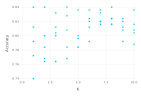

In [109]:
using Gadfly;
plot(x=plotdatax, y=plotdatay, Geom.point, Guide.xlabel("K"), Guide.ylabel("Accuracy"))